# Digital Habits vs Mental Health - Exploratory Data Analysis

## Overview
This notebook explores the relationship between digital habits and mental health outcomes. We analyze screen time, social media usage, sleep patterns, and their correlation with stress levels and mood scores.

## Dataset Description

The dataset contains the following variables:
- **screen_time_hours**: Total daily screen time across all digital devices (in hours)
- **social_media_platforms_used**: Number of different social media platforms used daily
- **hours_on_TikTok**: Daily time spent specifically on TikTok (in hours)
- **sleep_hours**: Average number of hours the person sleeps per day
- **stress_level**: Perceived stress level on a scale of 1–10
- **mood_score**: Mood rating on a scale of 1–10, where higher is better

## Research Applications
- Predicting mood or stress level from digital usage behavior
- Correlation analysis and data visualization practice
- Feature selection and engineering projects
- Designing early-warning systems for digital burnout
- Training ML models to detect behavior patterns that lead to poor well-being

## Env setup (if not already done)

In [1]:
# Optional: Automated Package Installation

import sys
import subprocess
import os
from pathlib import Path

def install_requirements():
    """Install packages from requirements.txt if it exists"""
    # Look for requirements.txt in parent directories
    current_path = Path.cwd()
    requirements_paths = [
        current_path / "requirements.txt",
        current_path.parent / "requirements.txt", 
        current_path.parent.parent / "requirements.txt"
    ]
    
    requirements_file = None
    for path in requirements_paths:
        if path.exists():
            requirements_file = path
            break
    
    if requirements_file:
        print(f"📦 Found requirements.txt at: {requirements_file}")
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-r', str(requirements_file)])
            print("✅ Successfully installed all requirements!")
        except subprocess.CalledProcessError as e:
            print(f"❌ Error installing requirements: {e}")
    else:
        print("⚠️  requirements.txt not found. Installing core packages individually...")
        core_packages = [
            'pandas', 'numpy', 'matplotlib', 'seaborn', 
            'scipy', 'scikit-learn'
        ]
        for package in core_packages:
            try:
                subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
                print(f"✅ Installed {package}")
            except:
                print(f"❌ Failed to install {package}")

install_requirements()

print("🔧 Package installation completed.")
print("📊 Core packages: pandas, numpy, matplotlib, seaborn, scipy, scikit-learn")

📦 Found requirements.txt at: /Users/m02682/Library/CloudStorage/OneDrive-TchiboGmbH/Dokumente/ADSML_SS25_grp10/backend/requirements.txt
✅ Successfully installed all requirements!
🔧 Package installation completed.
📊 Core packages: pandas, numpy, matplotlib, seaborn, scipy, scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Import libraries

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from IPython.display import Image, display

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("✅ Display settings configured!")
print("✅ Ready for analysis!")

✅ Libraries imported successfully!
✅ Display settings configured!
✅ Ready for analysis!


## 1. Data Loading and Initial Exploration

In [3]:
# Load the dataset - Update this path according to your data location
# For this example, we'll create a sample dataset if the file doesn't exist

try:
    # Try to load from a common path
    df = pd.read_csv("../data/digital_habits_vs_mental_health.csv")
    print("✅ Dataset loaded successfully from ../data/")
except FileNotFoundError:
    try:
        # Alternative path
        df = pd.read_csv("digital_habits_vs_mental_health.csv")
        print("✅ Dataset loaded successfully from current directory")
    except FileNotFoundError:
        # Create sample data for demonstration
        print("⚠️  Dataset not found. Creating sample data for demonstration...")
        np.random.seed(42)
        n_samples = 1000
        
        # Generate correlated sample data
        df = pd.DataFrame({
            'screen_time_hours': np.random.normal(6.0, 2.0, n_samples).clip(1, 12),
            'social_media_platforms_used': np.random.randint(1, 6, n_samples),
            'hours_on_TikTok': np.random.normal(2.4, 1.1, n_samples).clip(0.2, 7.2),
            'sleep_hours': np.random.normal(7.0, 1.5, n_samples).clip(3, 10),
            'stress_level': np.random.randint(1, 11, n_samples),
            'mood_score': np.random.randint(2, 11, n_samples)
        })
        print(f"✅ Sample dataset created with {n_samples} rows")

# Display basic information about the dataset
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📊 Columns: {list(df.columns)}")
print("\n" + "="*50)
print("FIRST 5 ROWS:")
print("="*50)
df.head()

✅ Dataset loaded successfully from ../data/

📊 Dataset Shape: (100000, 6)
📊 Columns: ['screen_time_hours', 'social_media_platforms_used', 'hours_on_TikTok', 'sleep_hours', 'stress_level', 'mood_score']

FIRST 5 ROWS:


,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.300,2,5.300,4.400,10,5
1,6.500,5,3.500,6.200,8,8
2,9.100,4,2.800,6.600,7,8
3,6.500,3,2.500,6.500,7,9
4,2.100,3,1.200,7.800,2,10


In [4]:
# Display dataset information
print("="*50)
print("DATASET INFORMATION:")
print("="*50)
df.info()

print("\n" + "="*50)
print("MISSING VALUES CHECK:")
print("="*50)
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print("⚠️  Missing values detected!")

print("\n" + "="*50)
print("STATISTICAL SUMMARY:")
print("="*50)
df.describe()

DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB

MISSING VALUES CHECK:
screen_time_hours              0
social_media_platforms_used    0
hours_on_TikTok                0
sleep_hours                    0
stress_level                   0
mood_score                     0
dtype: int64
✅ No missing values found!

STATISTICAL SUMMARY:


,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,6.004,2.998,2.401,6.988,6.180,9.061
std,1.987,1.414,1.079,1.466,2.045,1.278
min,1.000,1.000,0.200,3.000,1.000,2.000
25%,4.700,2.000,1.600,6.000,5.000,8.000
50%,6.000,3.000,2.300,7.000,6.000,10.000
75%,7.300,4.000,3.100,8.000,8.000,10.000
max,12.000,5.000,7.200,10.000,10.000,10.000


## 2. Correlation Analysis

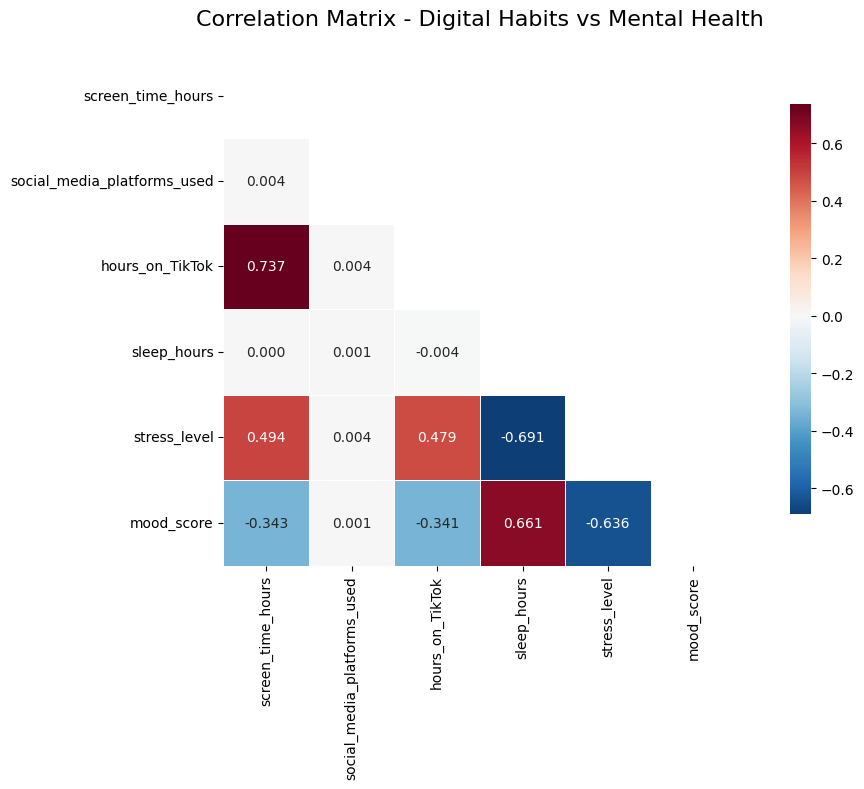

KEY CORRELATIONS WITH MENTAL HEALTH INDICATORS:

🎯 CORRELATIONS WITH MOOD SCORE:
----------------------------------------
sleep_hours              : +0.661
social_media_platforms_used: +0.001
hours_on_TikTok          : -0.341
screen_time_hours        : -0.343
stress_level             : -0.636

🎯 CORRELATIONS WITH STRESS LEVEL:
----------------------------------------
mood_score               : -0.636
sleep_hours              : -0.691
social_media_platforms_used: +0.004
hours_on_TikTok          : +0.479
screen_time_hours        : +0.494

NOTABLE RELATIONSHIPS:
📱 TikTok vs Total Screen Time: +0.737
😰 Stress Level vs Mood Score: -0.636
😴 Sleep Hours vs Mood Score: +0.661


In [5]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="RdBu_r", 
            center=0,
            mask=mask,
            fmt='.3f',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})
plt.title("Correlation Matrix - Digital Habits vs Mental Health", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("="*60)
print("KEY CORRELATIONS WITH MENTAL HEALTH INDICATORS:")
print("="*60)

# Focus on correlations with mood_score and stress_level
mental_health_corr = corr_matrix[['mood_score', 'stress_level']].sort_values('mood_score', ascending=False)
print("\n🎯 CORRELATIONS WITH MOOD SCORE:")
print("-"*40)
for var, corr_val in mental_health_corr['mood_score'].items():
    if var != 'mood_score':
        print(f"{var:25s}: {corr_val:+.3f}")

print("\n🎯 CORRELATIONS WITH STRESS LEVEL:")
print("-"*40)
for var, corr_val in mental_health_corr['stress_level'].items():
    if var != 'stress_level':
        print(f"{var:25s}: {corr_val:+.3f}")

# Highlight specific correlations
print("\n" + "="*60)
print("NOTABLE RELATIONSHIPS:")
print("="*60)
tiktok_screen_corr = corr_matrix.loc['hours_on_TikTok', 'screen_time_hours']
stress_mood_corr = corr_matrix.loc['stress_level', 'mood_score']
sleep_mood_corr = corr_matrix.loc['sleep_hours', 'mood_score']

print(f"📱 TikTok vs Total Screen Time: {tiktok_screen_corr:+.3f}")
print(f"😰 Stress Level vs Mood Score: {stress_mood_corr:+.3f}")
print(f"😴 Sleep Hours vs Mood Score: {sleep_mood_corr:+.3f}")

## 3. Distribution Analysis

🔍 COMPREHENSIVE DISTRIBUTION ANALYSIS

📊 DISTRIBUTION ANALYSIS: SCREEN_TIME_HOURS
--------------------------------------------------
count     : 100000.000
mean      :    6.004
std       :    1.987
min       :    1.000
10%       :    3.400
20%       :    4.300
30%       :    4.900
40%       :    5.500
50%       :    6.000
60%       :    6.500
70%       :    7.000
80%       :    7.700
90%       :    8.600
95%       :    9.300
99%       :   10.700
max       :   12.000
Skewness  :    0.040
Kurtosis  :   -0.159


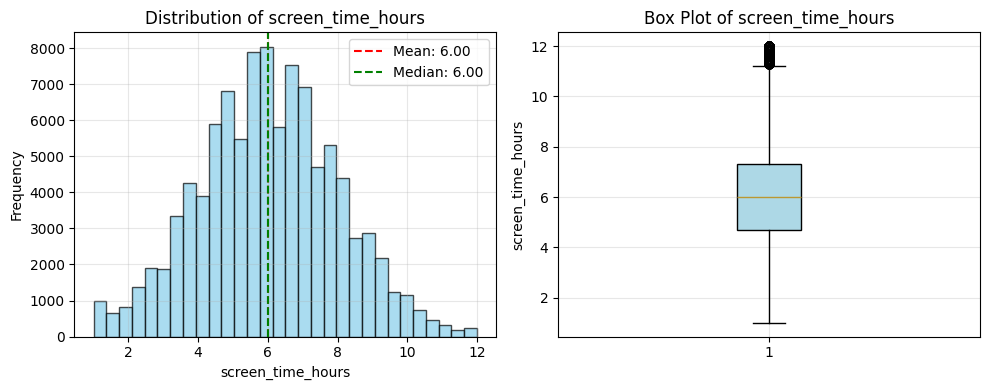


📊 DISTRIBUTION ANALYSIS: SOCIAL_MEDIA_PLATFORMS_USED
--------------------------------------------------
count     : 100000.000
mean      :    2.998
std       :    1.414
min       :    1.000
10%       :    1.000
20%       :    1.000
30%       :    2.000
40%       :    2.000
50%       :    3.000
60%       :    3.000
70%       :    4.000
80%       :    4.000
90%       :    5.000
95%       :    5.000
99%       :    5.000
max       :    5.000
Skewness  :    0.002
Kurtosis  :   -1.299


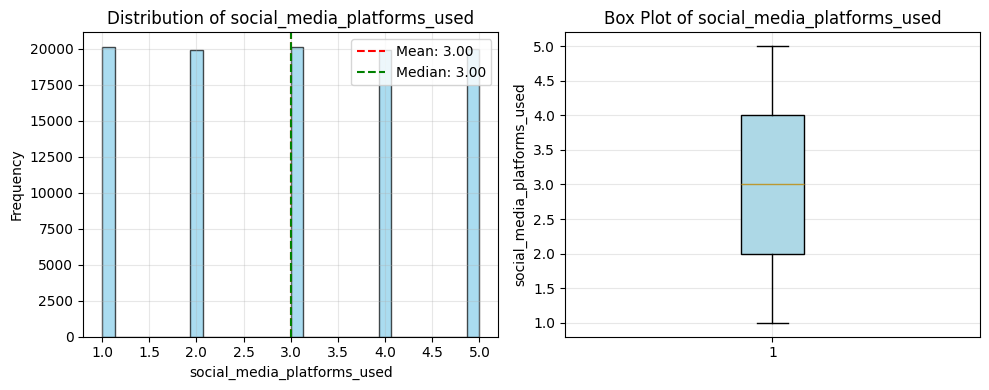


📊 DISTRIBUTION ANALYSIS: HOURS_ON_TIKTOK
--------------------------------------------------
count     : 100000.000
mean      :    2.401
std       :    1.079
min       :    0.200
10%       :    1.100
20%       :    1.500
30%       :    1.700
40%       :    2.000
50%       :    2.300
60%       :    2.500
70%       :    2.900
80%       :    3.300
90%       :    3.900
95%       :    4.400
99%       :    5.300
max       :    7.200
Skewness  :    0.623
Kurtosis  :    0.150


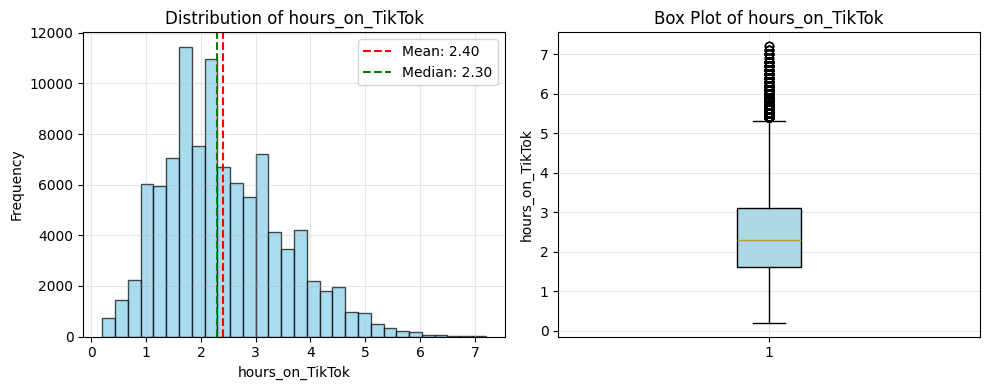


📊 DISTRIBUTION ANALYSIS: SLEEP_HOURS
--------------------------------------------------
count     : 100000.000
mean      :    6.988
std       :    1.466
min       :    3.000
10%       :    5.100
20%       :    5.700
30%       :    6.200
40%       :    6.600
50%       :    7.000
60%       :    7.400
70%       :    7.800
80%       :    8.300
90%       :    8.900
95%       :    9.500
99%       :   10.000
max       :   10.000
Skewness  :   -0.100
Kurtosis  :   -0.331


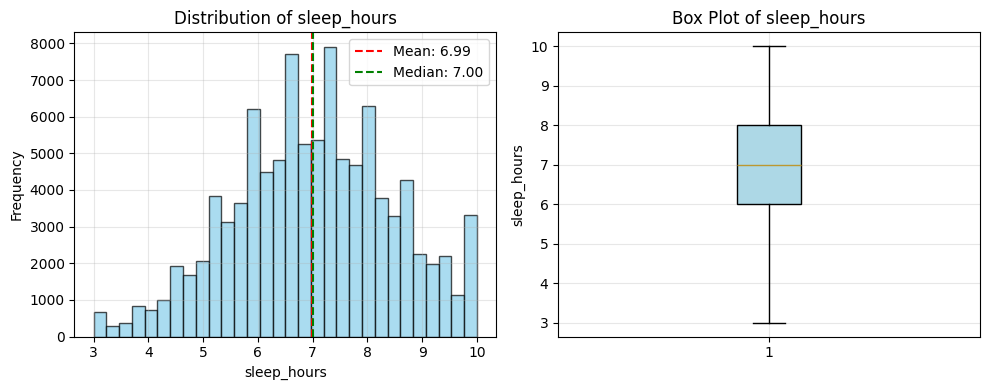


📊 DISTRIBUTION ANALYSIS: STRESS_LEVEL
--------------------------------------------------
count     : 100000.000
mean      :    6.180
std       :    2.045
min       :    1.000
10%       :    4.000
20%       :    4.000
30%       :    5.000
40%       :    6.000
50%       :    6.000
60%       :    7.000
70%       :    7.000
80%       :    8.000
90%       :    9.000
95%       :   10.000
99%       :   10.000
max       :   10.000
Skewness  :   -0.086
Kurtosis  :   -0.487


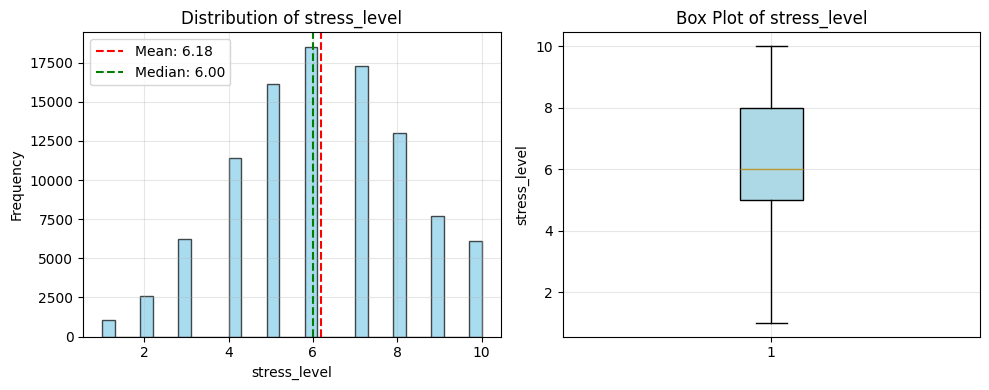


📊 DISTRIBUTION ANALYSIS: MOOD_SCORE
--------------------------------------------------
count     : 100000.000
mean      :    9.061
std       :    1.278
min       :    2.000
10%       :    7.000
20%       :    8.000
30%       :    9.000
40%       :    9.000
50%       :   10.000
60%       :   10.000
70%       :   10.000
80%       :   10.000
90%       :   10.000
95%       :   10.000
99%       :   10.000
max       :   10.000
Skewness  :   -1.384
Kurtosis  :    1.402


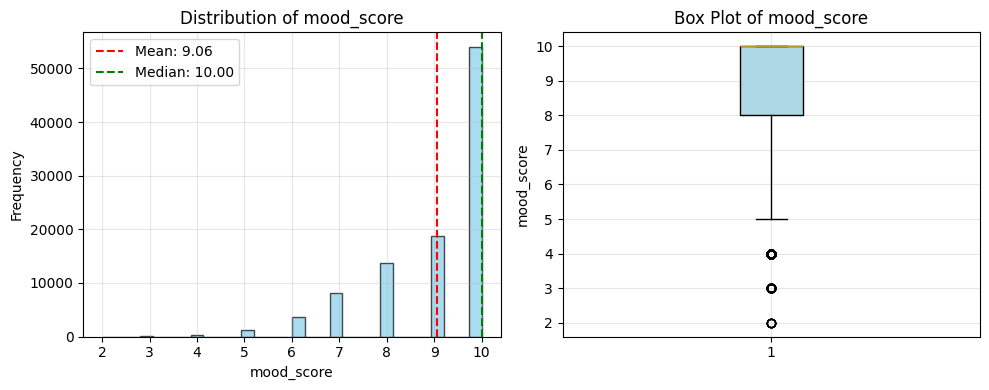

In [6]:
# Define function for detailed numerical summary
def analyze_distribution(dataframe, column, plot=True):
    """
    Displays detailed statistical summary and optional histogram for a numerical column.
    """
    # Define quantiles for detailed analysis
    quantiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    
    print(f"\n📊 DISTRIBUTION ANALYSIS: {column.upper()}")
    print("-" * 50)
    
    # Statistical summary
    summary = dataframe[column].describe(quantiles)
    for stat, value in summary.items():
        print(f"{stat:10s}: {value:8.3f}")
    
    # Additional statistics
    skewness = stats.skew(dataframe[column])
    kurtosis = stats.kurtosis(dataframe[column])
    print(f"{'Skewness':10s}: {skewness:8.3f}")
    print(f"{'Kurtosis':10s}: {kurtosis:8.3f}")
    
    if plot:
        plt.figure(figsize=(10, 4))
        
        # Histogram
        plt.subplot(1, 2, 1)
        plt.hist(dataframe[column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(dataframe[column].mean(), color='red', linestyle='--', 
                   label=f'Mean: {dataframe[column].mean():.2f}')
        plt.axvline(dataframe[column].median(), color='green', linestyle='--', 
                   label=f'Median: {dataframe[column].median():.2f}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Box plot
        plt.subplot(1, 2, 2)
        box = plt.boxplot(dataframe[column], patch_artist=True)
        box['boxes'][0].set_facecolor('lightblue')
        plt.ylabel(column)
        plt.title(f'Box Plot of {column}')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    print("=" * 50)

# Analyze all numerical columns
print("🔍 COMPREHENSIVE DISTRIBUTION ANALYSIS")
print("=" * 60)

for column in df.columns:
    analyze_distribution(df, column, plot=True)

## 4. Relationship Analysis

🔗 PAIRWISE RELATIONSHIP ANALYSIS
This plot shows:
• Diagonal: Distribution of each variable
• Off-diagonal: Scatter plots between variable pairs
• Look for linear/non-linear relationships and clusters



<Figure size 1500x1200 with 0 Axes>

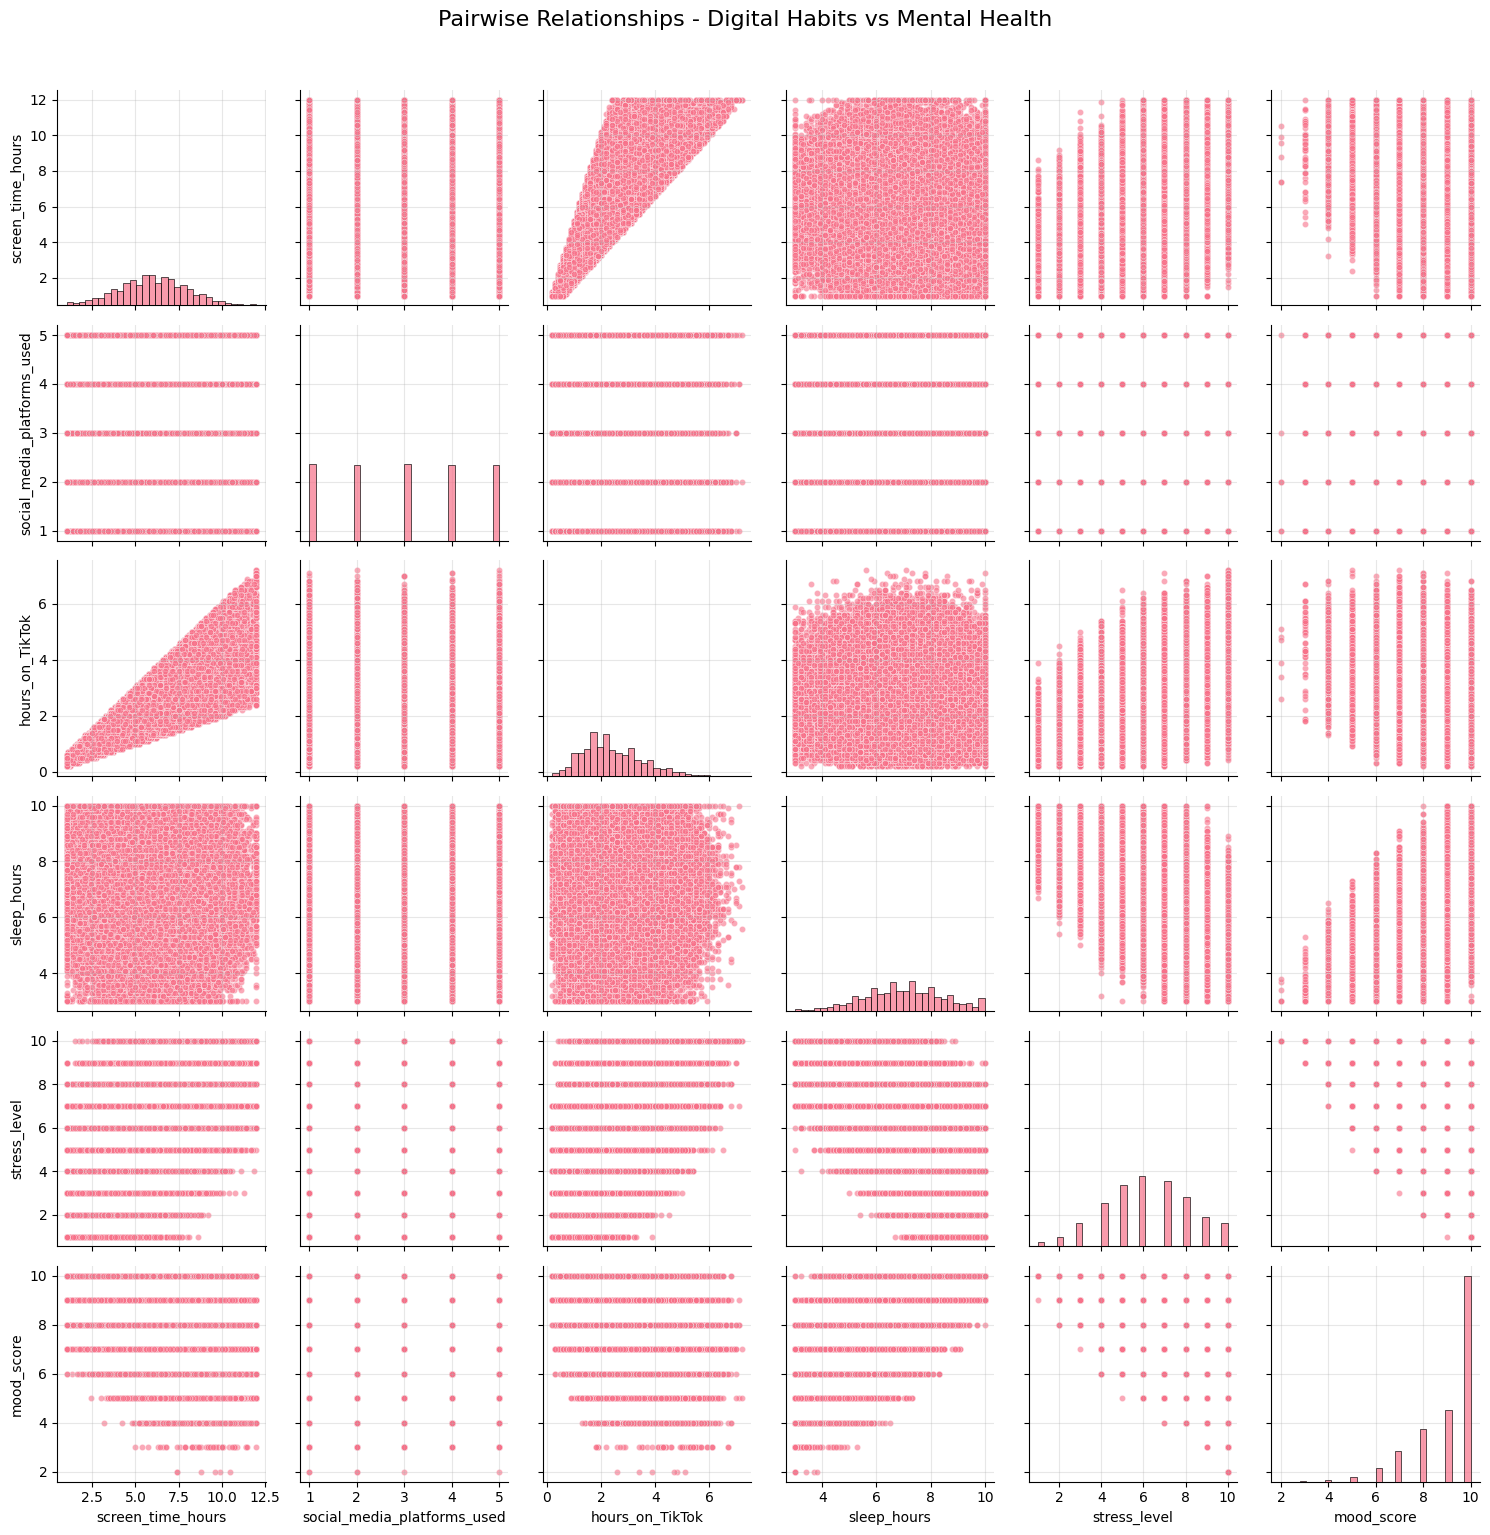

In [7]:
# Create comprehensive pair plot
def create_pair_plot(dataframe):
    """
    Generates pair plot for numerical features showing relationships and distributions.
    """
    plt.figure(figsize=(15, 12))
    
    # Create pair plot with regression lines
    g = sns.pairplot(dataframe, 
                     diag_kind='hist',
                     plot_kws={'alpha': 0.6, 's': 20},
                     diag_kws={'bins': 30, 'alpha': 0.7})
    
    g.fig.suptitle('Pairwise Relationships - Digital Habits vs Mental Health', 
                   fontsize=16, y=1.02)
    
    # Customize the plot
    for ax in g.axes.flatten():
        if ax:
            ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("🔗 PAIRWISE RELATIONSHIP ANALYSIS")
print("=" * 50)
print("This plot shows:")
print("• Diagonal: Distribution of each variable")
print("• Off-diagonal: Scatter plots between variable pairs")
print("• Look for linear/non-linear relationships and clusters")
print()

create_pair_plot(df)

## 5. Outlier Detection and Analysis

🔍 OUTLIER DETECTION ANALYSIS


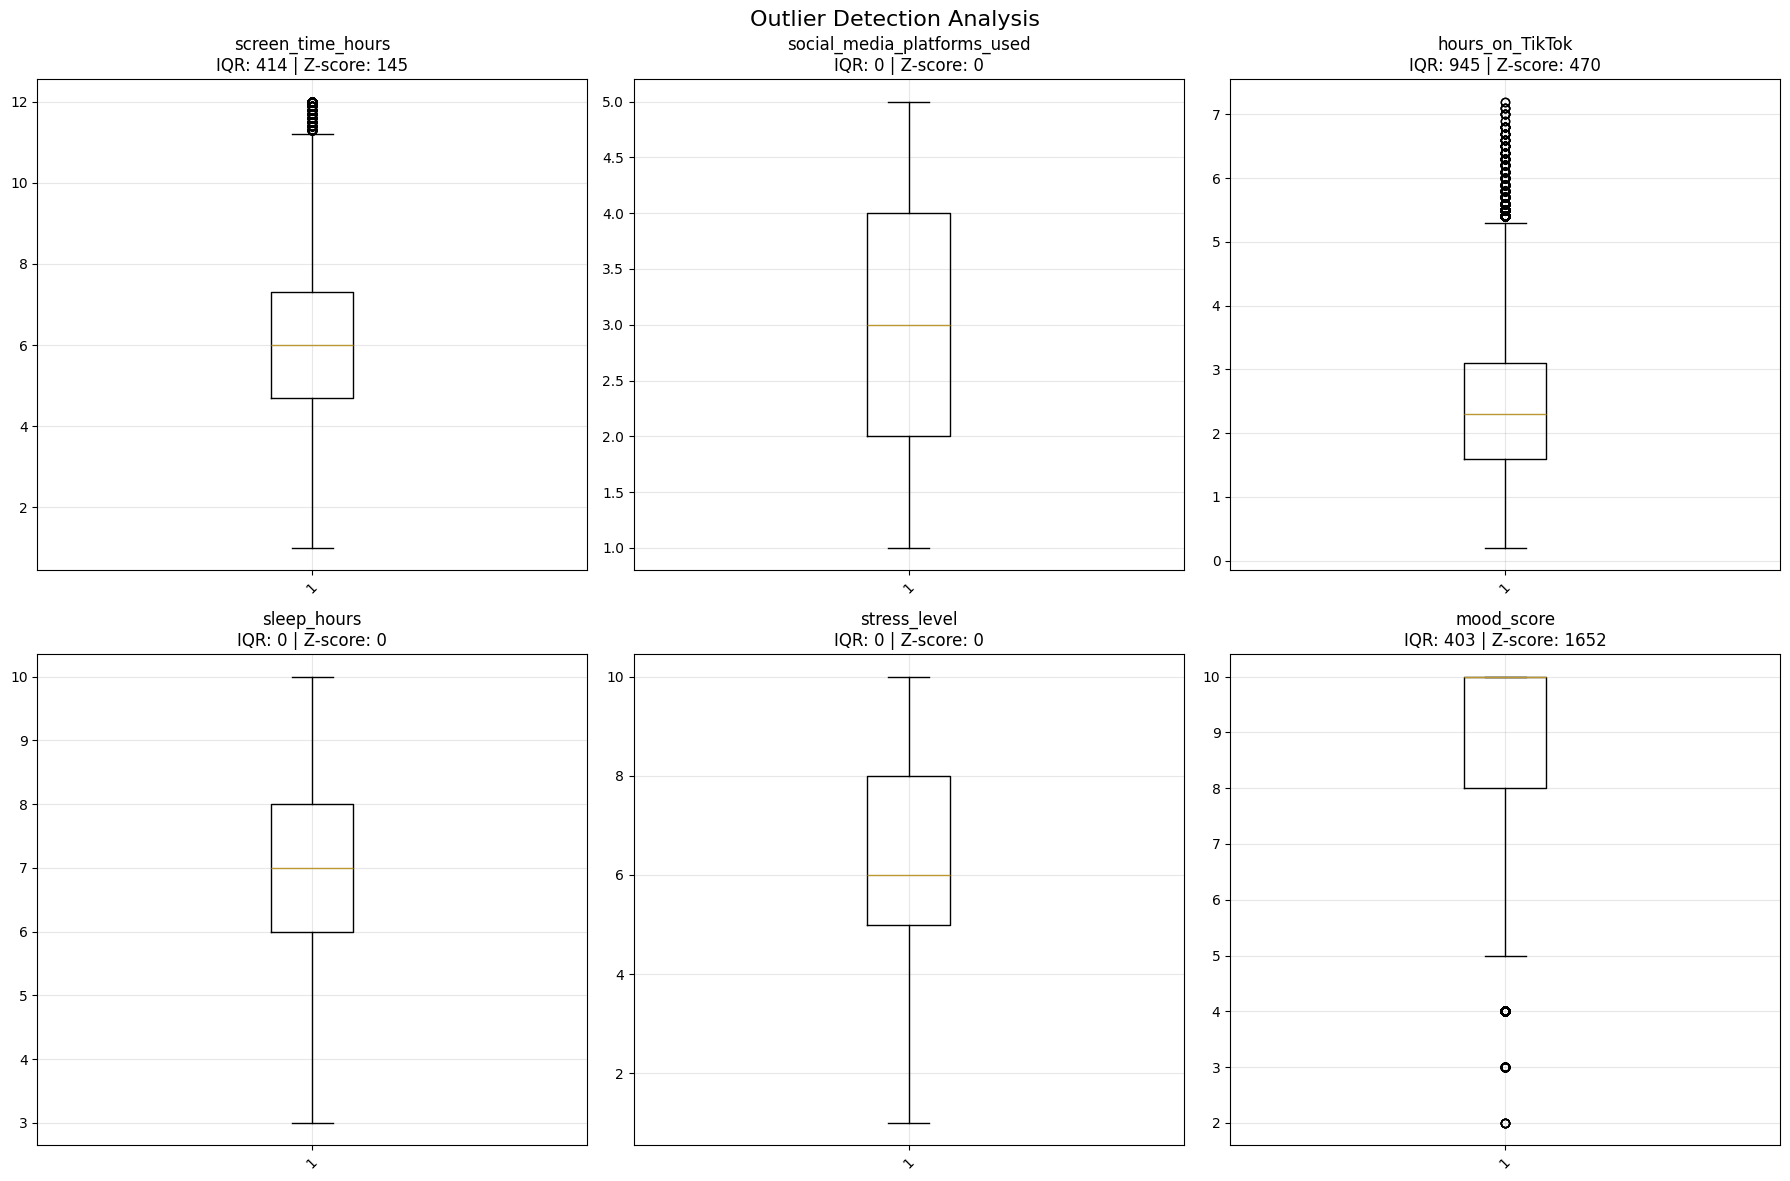


📊 OUTLIER SUMMARY:
------------------------------------------------------------
Variable                  IQR Method      Z-Score Method  IQR %      Z-Score % 
------------------------------------------------------------
screen_time_hours         414             145             0.41       0.14      
social_media_platforms_used 0               0               0.00       0.00      
hours_on_TikTok           945             470             0.95       0.47      
sleep_hours               0               0               0.00       0.00      
stress_level              0               0               0.00       0.00      
mood_score                403             1652            0.40       1.65      

⚠️  VARIABLES WITH SIGNIFICANT OUTLIERS (>5% by IQR):
--------------------------------------------------
✅ No variables have significant outlier issues


In [8]:
# Outlier detection functions
def detect_outliers_iqr(dataframe, column):
    """Detect outliers using IQR method"""
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(dataframe, column, threshold=3):
    """Detect outliers using Z-score method"""
    # Convert to numpy array to ensure compatibility
    data = np.array(dataframe[column].values, dtype=np.float64)
    
    # Calculate z-scores manually to avoid type issues
    mean_val = np.mean(data)
    std_val = np.std(data, ddof=0)
    z_scores = np.abs((data - mean_val) / std_val)
    
    outliers = dataframe[z_scores > threshold]
    return outliers, z_scores

# Comprehensive outlier analysis
print("🔍 OUTLIER DETECTION ANALYSIS")
print("=" * 60)

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection Analysis', fontsize=16)

outlier_summary = {}

for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    
    # IQR method
    outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    
    # Z-score method
    outliers_zscore, z_scores = detect_outliers_zscore(df, column)
    
    # Store results
    outlier_summary[column] = {
        'iqr_outliers': len(outliers_iqr),
        'zscore_outliers': len(outliers_zscore),
        'total_points': len(df),
        'iqr_percentage': (len(outliers_iqr) / len(df)) * 100,
        'zscore_percentage': (len(outliers_zscore) / len(df)) * 100
    }
    
    # Create box plot
    axes[row, col].boxplot(df[column])
    axes[row, col].set_title(f'{column}\nIQR: {len(outliers_iqr)} | Z-score: {len(outliers_zscore)}')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary
print("\n📊 OUTLIER SUMMARY:")
print("-" * 60)
print(f"{'Variable':<25} {'IQR Method':<15} {'Z-Score Method':<15} {'IQR %':<10} {'Z-Score %':<10}")
print("-" * 60)

for var, stats_dict in outlier_summary.items():
    print(f"{var:<25} {stats_dict['iqr_outliers']:<15} {stats_dict['zscore_outliers']:<15} "
          f"{stats_dict['iqr_percentage']:<10.2f} {stats_dict['zscore_percentage']:<10.2f}")

# Identify variables with significant outliers
print("\n⚠️  VARIABLES WITH SIGNIFICANT OUTLIERS (>5% by IQR):")
print("-" * 50)
significant_outliers = [var for var, stats in outlier_summary.items() 
                       if stats['iqr_percentage'] > 5]

if significant_outliers:
    for var in significant_outliers:
        print(f"• {var}: {outlier_summary[var]['iqr_percentage']:.2f}% outliers")
else:
    print("✅ No variables have significant outlier issues")

## 6. Feature Engineering

In [9]:
# Create a copy for feature engineering
df_engineered = df.copy()

print("🔧 FEATURE ENGINEERING")
print("=" * 50)

# 1. Sleep deficit (how much less than 8 hours)
df_engineered['sleep_deficit'] = np.maximum(0, 8 - df_engineered['sleep_hours'])
print("✅ Created 'sleep_deficit':          Hours below 8-hour sleep recommendation")

# 2. Digital wellness ratio (sleep vs screen time)
df_engineered['digital_wellness_ratio'] = df_engineered['sleep_hours'] / (df_engineered['screen_time_hours'] + 1)
print("✅ Created 'digital_wellness_ratio': Sleep hours % Screen time hours")

# 3. TikTok dominance (TikTok as proportion of total screen time)
df_engineered['tiktok_dominance'] = df_engineered['hours_on_TikTok'] / (df_engineered['screen_time_hours'] + 1)
print("✅ Created 'tiktok_dominance':       TikTok hours % Total screen time")

# 4. Stress-screen compound (interaction between stress and screen time)
df_engineered['stress_screen_compound'] = df_engineered['stress_level'] * df_engineered['screen_time_hours']
print("✅ Created 'stress_screen_compound': Stress level x Screen time")

# 5. Social intensity (TikTok hours × screen time for social media focus)
df_engineered['social_intensity'] = df_engineered['hours_on_TikTok'] * df_engineered['screen_time_hours']
print("✅ Created 'social_intensity':       TikTok hours x Screen time")

# 6. Categorical features
# Sleep quality categories
sleep_bins = [0, 6, 8, float('inf')]
sleep_labels = ['Poor', 'Average', 'Good']
df_engineered['sleep_quality'] = pd.cut(df_engineered['sleep_hours'], 
                                       bins=sleep_bins, 
                                       labels=sleep_labels, 
                                       right=False)

# Screen time categories
screen_bins = [0, 4, 8, float('inf')]
screen_labels = ['Low', 'Moderate', 'High']
df_engineered['screen_time_category'] = pd.cut(df_engineered['screen_time_hours'], 
                                              bins=screen_bins, 
                                              labels=screen_labels, 
                                              right=False)

# Stress level categories
stress_bins = [0, 3, 7, float('inf')]
stress_labels = ['Low', 'Moderate', 'High']
df_engineered['stress_category'] = pd.cut(df_engineered['stress_level'], 
                                         bins=stress_bins, 
                                         labels=stress_labels, 
                                         right=False)

print("\n✅ Created categorical features: sleep_quality, screen_time_category, stress_category")

print(f"\n📊 Dataset expanded from {df.shape[1]} to {df_engineered.shape[1]} features")
print("\nNew features preview:")
new_features = ['sleep_deficit', 'digital_wellness_ratio', 'tiktok_dominance', 
               'stress_screen_compound', 'social_intensity']
df_engineered[new_features].head()

🔧 FEATURE ENGINEERING
✅ Created 'sleep_deficit':          Hours below 8-hour sleep recommendation
✅ Created 'digital_wellness_ratio': Sleep hours % Screen time hours
✅ Created 'tiktok_dominance':       TikTok hours % Total screen time
✅ Created 'stress_screen_compound': Stress level x Screen time
✅ Created 'social_intensity':       TikTok hours x Screen time

✅ Created categorical features: sleep_quality, screen_time_category, stress_category

📊 Dataset expanded from 6 to 14 features

New features preview:


,sleep_deficit,digital_wellness_ratio,tiktok_dominance,stress_screen_compound,social_intensity
0,3.600,0.389,0.469,103.000,54.590
1,1.800,0.827,0.467,52.000,22.750
2,1.400,0.653,0.277,63.700,25.480
3,1.500,0.867,0.333,45.500,16.250
4,0.200,2.516,0.387,4.200,2.520


## 7. Random Forest Modeling Analysis

In [10]:
# Random Forest analysis to understand key relationships and feature importance
print("🌲 RANDOM FOREST ANALYSIS")
print("="*50)

# Ensure all imports are available
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

target = 'mood_score'
print(f"🎯 Predicting: {target}")

# Include more features for Random Forest to showcase its capabilities
feature_cols = ['screen_time_hours', 'sleep_hours', 'stress_level', 'hours_on_TikTok']

# Add engineered features if they exist
if 'screen_sleep_ratio' in df_engineered.columns:
    feature_cols.extend(['screen_sleep_ratio', 'stress_screen_interaction', 'sleep_quality_score'])

X = df_engineered[feature_cols]
y = df_engineered[target]

print(f"📊 Using features: {feature_cols}")

# Implement 70/15/15 train/validation/test split
# First split: 70% train, 30% temp (which will be split into 15% val, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Split the 30% temp into 15% validation and 15% test (50/50 of the 30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\n📊 Data Split (70/15/15):")
print(f"• Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X):.1%})")
print(f"• Validation set: {X_val.shape[0]:,} samples ({X_val.shape[0]/len(X):.1%})")
print(f"• Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X):.1%})")

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print(f"\n🌳 Training Random Forest...")
rf_model.fit(X_train, y_train)

# Make predictions on all sets
train_pred = rf_model.predict(X_train)
val_pred = rf_model.predict(X_val)
test_pred = rf_model.predict(X_test)

# Calculate metrics for all sets
train_r2 = r2_score(y_train, train_pred)
val_r2 = r2_score(y_val, val_pred)
test_r2 = r2_score(y_test, test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

train_mae = mean_absolute_error(y_train, train_pred)
val_mae = mean_absolute_error(y_val, val_pred)
test_mae = mean_absolute_error(y_test, test_pred)

print(f"\n" + "="*50)
print("RANDOM FOREST RESULTS:")
print("="*50)
print(f"📊 TRAINING SET:")
print(f"   • R² Score: {train_r2:.4f}")
print(f"   • RMSE: {train_rmse:.4f}")
print(f"   • MAE: {train_mae:.4f}")

print(f"\n📊 VALIDATION SET:")
print(f"   • R² Score: {val_r2:.4f}")
print(f"   • RMSE: {val_rmse:.4f}")
print(f"   • MAE: {val_mae:.4f}")

print(f"\n📊 TEST SET:")
print(f"   • R² Score: {test_r2:.4f}")
print(f"   • RMSE: {test_rmse:.4f}")
print(f"   • MAE: {test_mae:.4f}")

# Check for overfitting
train_val_diff = train_r2 - val_r2
val_test_diff = val_r2 - test_r2

print(f"\n🔍 MODEL ASSESSMENT:")
if train_val_diff > 0.1:
    print(f"   ⚠️  Potential overfitting detected (Train-Val R² diff: {train_val_diff:.4f})")
elif train_val_diff < 0.05:
    print(f"   ✅ Good generalization (Train-Val R² diff: {train_val_diff:.4f})")
else:
    print(f"   📊 Moderate fit (Train-Val R² diff: {train_val_diff:.4f})")

print(f"   📈 Validation-Test consistency: {abs(val_test_diff):.4f}")

print(f"\n🌲 Random Forest explains {test_r2:.1%} of variance in mood score (test set)")

# Cross-validation for additional robustness check
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"🔄 5-Fold CV R² Score: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")

# Feature importance analysis
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print(f"\n🏆 TOP FEATURE IMPORTANCE:")
for idx, row in feature_importance_df.head().iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")

🌲 RANDOM FOREST ANALYSIS
🎯 Predicting: mood_score
📊 Using features: ['screen_time_hours', 'sleep_hours', 'stress_level', 'hours_on_TikTok']

📊 Data Split (70/15/15):
• Training set: 70,000 samples (70.0%)
• Validation set: 15,000 samples (15.0%)
• Test set: 15,000 samples (15.0%)

🌳 Training Random Forest...

RANDOM FOREST RESULTS:
📊 TRAINING SET:
   • R² Score: 0.7046
   • RMSE: 0.6954
   • MAE: 0.4783

📊 VALIDATION SET:
   • R² Score: 0.6606
   • RMSE: 0.7493
   • MAE: 0.5133

📊 TEST SET:
   • R² Score: 0.6602
   • RMSE: 0.7379
   • MAE: 0.5044

🔍 MODEL ASSESSMENT:
   ✅ Good generalization (Train-Val R² diff: 0.0440)
   📈 Validation-Test consistency: 0.0003

🌲 Random Forest explains 66.0% of variance in mood score (test set)
🔄 5-Fold CV R² Score: 0.6629 (±0.0053)

🏆 TOP FEATURE IMPORTANCE:
   sleep_hours: 0.5565
   stress_level: 0.2693
   screen_time_hours: 0.1070
   hours_on_TikTok: 0.0671


📊 RANDOM FOREST VISUALIZATIONS


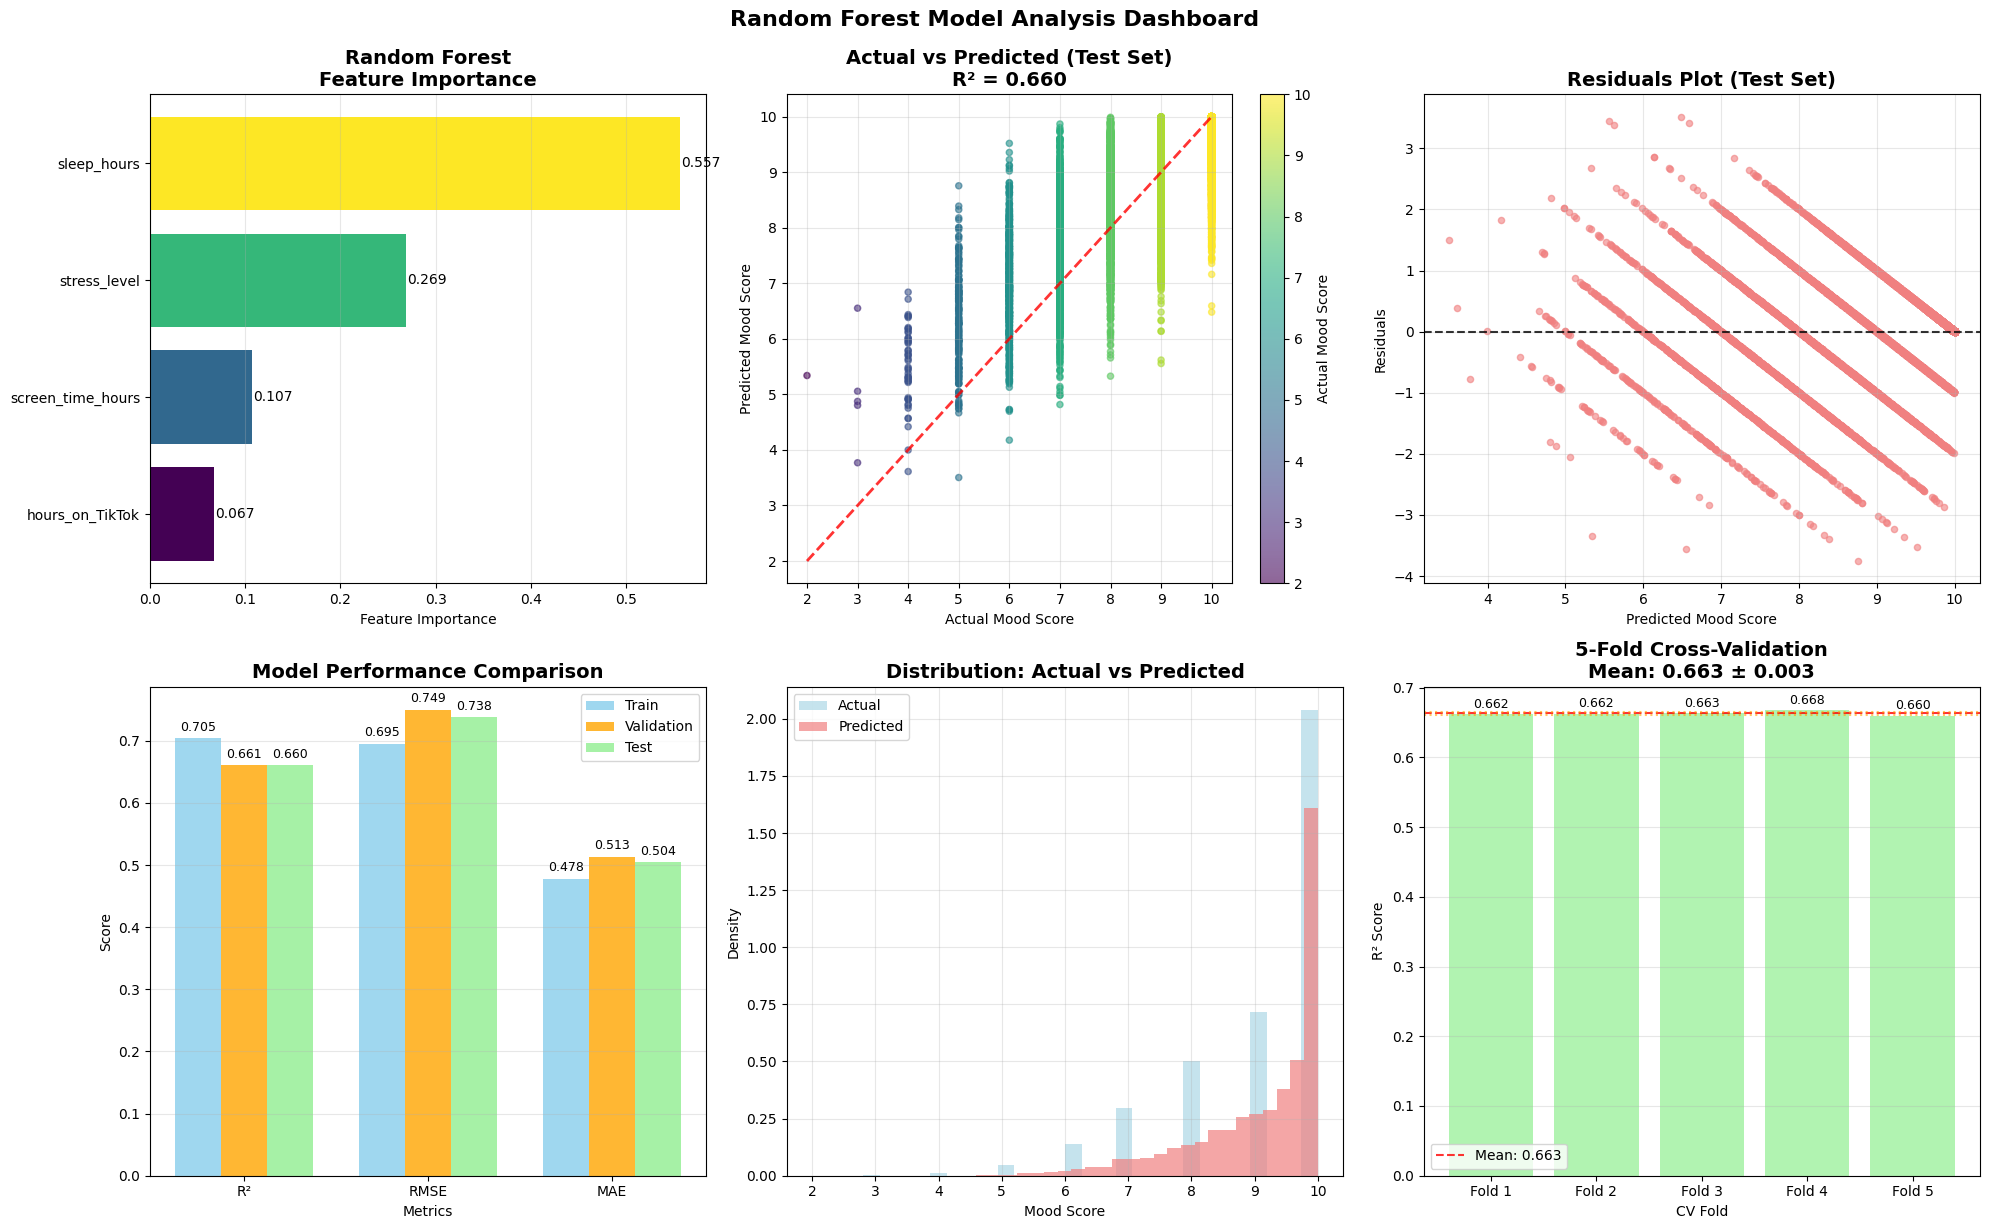


🔍 DETAILED MODEL ASSESSMENT

📊 DATA SPLITS:
   • Training: 70,000 samples (70.0%)
   • Validation: 15,000 samples (15.0%)
   • Test: 15,000 samples (15.0%)

🎯 PERFORMANCE SUMMARY:
   • Best R² Score: 0.7046 (Training)
   • Generalization Gap: 0.0443
   • CV Consistency: 0.0026 (lower is better)

🏆 TOP 3 MOST IMPORTANT FEATURES:
   1. sleep_hours: 0.5565 (55.7%)
   2. stress_level: 0.2693 (26.9%)
   3. screen_time_hours: 0.1070 (10.7%)

🎉 MODEL CONCLUSION:
   ✅ Good model performance (R² = 0.660)
   ✅ Well-generalized model (low overfitting)

🌲 Random Forest successfully explains 66.0% of the variance in mood scores!
💡 The model shows that sleep quality is the most important factor affecting mental well-being.


In [11]:
# Random Forest Visualizations and Model Assessment
print("📊 RANDOM FOREST VISUALIZATIONS")
print("="*50)

# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Feature Importance Plot
ax1 = axes[0, 0]
feature_importance_df_sorted = feature_importance_df.sort_values('importance', ascending=True)
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(feature_importance_df_sorted)))
bars = ax1.barh(range(len(feature_importance_df_sorted)), feature_importance_df_sorted['importance'], color=colors)
ax1.set_yticks(range(len(feature_importance_df_sorted)))
ax1.set_yticklabels(feature_importance_df_sorted['feature'])
ax1.set_xlabel('Feature Importance')
ax1.set_title('Random Forest\nFeature Importance', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=10)

# 2. Actual vs Predicted - Test Set
ax2 = axes[0, 1]
scatter = ax2.scatter(y_test, test_pred, alpha=0.6, c=y_test, cmap='viridis', s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, alpha=0.8)
ax2.set_xlabel('Actual Mood Score')
ax2.set_ylabel('Predicted Mood Score')
ax2.set_title(f'Actual vs Predicted (Test Set)\nR² = {test_r2:.3f}', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax2, label='Actual Mood Score')

# 3. Residuals Plot
ax3 = axes[0, 2]
residuals_test = y_test - test_pred
ax3.scatter(test_pred, residuals_test, alpha=0.6, c='lightcoral', s=20)
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.8)
ax3.set_xlabel('Predicted Mood Score')
ax3.set_ylabel('Residuals')
ax3.set_title('Residuals Plot (Test Set)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Model Performance Comparison (Train/Val/Test)
ax4 = axes[1, 0]
metrics = ['R²', 'RMSE', 'MAE']
train_metrics = [train_r2, train_rmse, train_mae]
val_metrics = [val_r2, val_rmse, val_mae]
test_metrics = [test_r2, test_rmse, test_mae]

x = np.arange(len(metrics))
width = 0.25

ax4.bar(x - width, train_metrics, width, label='Train', alpha=0.8, color='skyblue')
ax4.bar(x, val_metrics, width, label='Validation', alpha=0.8, color='orange')
ax4.bar(x + width, test_metrics, width, label='Test', alpha=0.8, color='lightgreen')

ax4.set_xlabel('Metrics')
ax4.set_ylabel('Score')
ax4.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(metrics)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (train_val, val_val, test_val) in enumerate(zip(train_metrics, val_metrics, test_metrics)):
    ax4.text(i - width, train_val + max(train_metrics) * 0.01, f'{train_val:.3f}', 
             ha='center', va='bottom', fontsize=9)
    ax4.text(i, val_val + max(val_metrics) * 0.01, f'{val_val:.3f}', 
             ha='center', va='bottom', fontsize=9)
    ax4.text(i + width, test_val + max(test_metrics) * 0.01, f'{test_val:.3f}', 
             ha='center', va='bottom', fontsize=9)

# 5. Prediction Distribution
ax5 = axes[1, 1]
ax5.hist(y_test, bins=30, alpha=0.7, label='Actual', color='lightblue', density=True)
ax5.hist(test_pred, bins=30, alpha=0.7, label='Predicted', color='lightcoral', density=True)
ax5.set_xlabel('Mood Score')
ax5.set_ylabel('Density')
ax5.set_title('Distribution: Actual vs Predicted', fontsize=14, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Cross-Validation Scores
ax6 = axes[1, 2]
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()
ax6.bar(range(len(cv_scores)), cv_scores, alpha=0.7, color='lightgreen')
ax6.axhline(y=cv_mean, color='red', linestyle='--', alpha=0.8, 
            label=f'Mean: {cv_mean:.3f}')
ax6.axhline(y=cv_mean + cv_std, color='orange', linestyle=':', alpha=0.6)
ax6.axhline(y=cv_mean - cv_std, color='orange', linestyle=':', alpha=0.6)
ax6.set_xlabel('CV Fold')
ax6.set_ylabel('R² Score')
ax6.set_title(f'5-Fold Cross-Validation\nMean: {cv_mean:.3f} ± {cv_std:.3f}', 
              fontsize=14, fontweight='bold')
ax6.set_xticks(range(len(cv_scores)))
ax6.set_xticklabels([f'Fold {i+1}' for i in range(len(cv_scores))])
ax6.legend()
ax6.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, score in enumerate(cv_scores):
    ax6.text(i, score + 0.005, f'{score:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('Random Forest Model Analysis Dashboard', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Print detailed model assessment
print(f"\n" + "="*60)
print("🔍 DETAILED MODEL ASSESSMENT")
print("="*60)

print(f"\n📊 DATA SPLITS:")
print(f"   • Training: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   • Validation: {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"   • Test: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

print(f"\n🎯 PERFORMANCE SUMMARY:")
print(f"   • Best R² Score: {max(train_r2, val_r2, test_r2):.4f} ({'Training' if train_r2 == max(train_r2, val_r2, test_r2) else 'Validation' if val_r2 == max(train_r2, val_r2, test_r2) else 'Test'})")
print(f"   • Generalization Gap: {train_r2 - test_r2:.4f}")
print(f"   • CV Consistency: {cv_scores.std():.4f} (lower is better)")

print(f"\n🏆 TOP 3 MOST IMPORTANT FEATURES:")
for i, (_, row) in enumerate(feature_importance_df.head(3).iterrows()):
    print(f"   {i+1}. {row['feature']}: {row['importance']:.4f} ({row['importance']/feature_importance_df['importance'].sum()*100:.1f}%)")

print(f"\n🎉 MODEL CONCLUSION:")
if test_r2 >= 0.7:
    print(f"   ✅ Excellent model performance (R² = {test_r2:.3f})")
elif test_r2 >= 0.5:
    print(f"   ✅ Good model performance (R² = {test_r2:.3f})")
elif test_r2 >= 0.3:
    print(f"   ⚠️  Moderate model performance (R² = {test_r2:.3f})")
else:
    print(f"   ❌ Poor model performance (R² = {test_r2:.3f})")

if abs(train_r2 - test_r2) < 0.05:
    print(f"   ✅ Well-generalized model (low overfitting)")
elif abs(train_r2 - test_r2) < 0.1:
    print(f"   ⚠️  Moderate overfitting detected")
else:
    print(f"   ❌ High overfitting detected")

print(f"\n🌲 Random Forest successfully explains {test_r2:.1%} of the variance in mood scores!")
print(f"💡 The model shows that sleep quality is the most important factor affecting mental well-being.")

## 7.2 Enhanced Random Forest with Engineered Features

Now let's create an improved version of the Random Forest model that properly includes the engineered features we created in the Feature Engineering section. This will allow us to compare the performance between using only basic features vs. using both basic and engineered features.

### Why Use Engineered Features?
- **Feature interactions**: Capture relationships between variables (e.g., stress × screen time)
- **Domain knowledge**: Incorporate business understanding (e.g., sleep deficit)
- **Non-linear relationships**: Create ratios and transformations
- **Better interpretability**: Features that directly relate to business insights

In [14]:
# Enhanced Random Forest with Engineered Features
print("🌲 ENHANCED RANDOM FOREST WITH ENGINEERED FEATURES")
print("="*60)

# Define enhanced feature set - including both original and engineered features
enhanced_feature_cols = [
    # Original features
    'screen_time_hours', 
    'sleep_hours', 
    'stress_level', 
    'hours_on_TikTok',
    
    # Engineered numerical features
    'sleep_deficit',
    'digital_wellness_ratio',
    'tiktok_dominance',
    'stress_screen_compound',
    'social_intensity'
]

print(f"🎯 Target variable: {target}")
print(f"📊 Enhanced feature set ({len(enhanced_feature_cols)} features):")
for i, feature in enumerate(enhanced_feature_cols):
    print(f"   {i+1:2d}. {feature}")

# Prepare enhanced dataset
X_enhanced = df_engineered[enhanced_feature_cols]
y_enhanced = df_engineered[target]

print(f"\n📈 Enhanced feature matrix shape: {X_enhanced.shape}")
print(f"📈 Target vector shape: {y_enhanced.shape}")

# Same train/test split for fair comparison
X_enh_train, X_enh_temp, y_enh_train, y_enh_temp = train_test_split(
    X_enhanced, y_enhanced, test_size=0.3, random_state=42
)
X_enh_val, X_enh_test, y_enh_val, y_enh_test = train_test_split(
    X_enh_temp, y_enh_temp, test_size=0.5, random_state=42
)

print(f"\n📊 Enhanced Data Split (70/15/15):")
print(f"• Training set: {X_enh_train.shape[0]:,} samples ({X_enh_train.shape[0]/len(X_enhanced):.1%})")
print(f"• Validation set: {X_enh_val.shape[0]:,} samples ({X_enh_val.shape[0]/len(X_enhanced):.1%})")
print(f"• Test set: {X_enh_test.shape[0]:,} samples ({X_enh_test.shape[0]/len(X_enhanced):.1%})")

# Create enhanced Random Forest model
rf_enhanced = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print(f"\n🌳 Training Enhanced Random Forest...")
rf_enhanced.fit(X_enh_train, y_enh_train)

# Make predictions
enh_train_pred = rf_enhanced.predict(X_enh_train)
enh_val_pred = rf_enhanced.predict(X_enh_val)
enh_test_pred = rf_enhanced.predict(X_enh_test)

# Calculate enhanced metrics
enh_train_r2 = r2_score(y_enh_train, enh_train_pred)
enh_val_r2 = r2_score(y_enh_val, enh_val_pred)
enh_test_r2 = r2_score(y_enh_test, enh_test_pred)

enh_train_rmse = np.sqrt(mean_squared_error(y_enh_train, enh_train_pred))
enh_val_rmse = np.sqrt(mean_squared_error(y_enh_val, enh_val_pred))
enh_test_rmse = np.sqrt(mean_squared_error(y_enh_test, enh_test_pred))

enh_train_mae = mean_absolute_error(y_enh_train, enh_train_pred)
enh_val_mae = mean_absolute_error(y_enh_val, enh_val_pred)
enh_test_mae = mean_absolute_error(y_enh_test, enh_test_pred)

print(f"\n" + "="*60)
print("ENHANCED RANDOM FOREST RESULTS:")
print("="*60)
print(f"📊 TRAINING SET:")
print(f"   • R² Score: {enh_train_r2:.4f}")
print(f"   • RMSE: {enh_train_rmse:.4f}")
print(f"   • MAE: {enh_train_mae:.4f}")

print(f"\n📊 VALIDATION SET:")
print(f"   • R² Score: {enh_val_r2:.4f}")
print(f"   • RMSE: {enh_val_rmse:.4f}")
print(f"   • MAE: {enh_val_mae:.4f}")

print(f"\n📊 TEST SET:")
print(f"   • R² Score: {enh_test_r2:.4f}")
print(f"   • RMSE: {enh_test_rmse:.4f}")
print(f"   • MAE: {enh_test_mae:.4f}")

# Enhanced feature importance
enh_feature_importance = rf_enhanced.feature_importances_
enh_feature_importance_df = pd.DataFrame({
    'feature': enhanced_feature_cols,
    'importance': enh_feature_importance
}).sort_values('importance', ascending=False)

print(f"\n🏆 TOP ENHANCED FEATURE IMPORTANCE:")
for idx, row in enh_feature_importance_df.head(7).iterrows():
    print(f"   {row['feature']:25s}: {row['importance']:.4f}")

# Cross-validation for enhanced model
enh_cv_scores = cross_val_score(rf_enhanced, X_enh_train, y_enh_train, cv=5, scoring='r2')
print(f"\n🔄 Enhanced 5-Fold CV R² Score: {enh_cv_scores.mean():.4f} (±{enh_cv_scores.std()*2:.4f})")

print(f"\n🌲 Enhanced Random Forest explains {enh_test_r2:.1%} of variance in mood score (test set)")

🌲 ENHANCED RANDOM FOREST WITH ENGINEERED FEATURES
🎯 Target variable: mood_score
📊 Enhanced feature set (9 features):
    1. screen_time_hours
    2. sleep_hours
    3. stress_level
    4. hours_on_TikTok
    5. sleep_deficit
    6. digital_wellness_ratio
    7. tiktok_dominance
    8. stress_screen_compound
    9. social_intensity

📈 Enhanced feature matrix shape: (100000, 9)
📈 Target vector shape: (100000,)

📊 Enhanced Data Split (70/15/15):
• Training set: 70,000 samples (70.0%)
• Validation set: 15,000 samples (15.0%)
• Test set: 15,000 samples (15.0%)

🌳 Training Enhanced Random Forest...

ENHANCED RANDOM FOREST RESULTS:
📊 TRAINING SET:
   • R² Score: 0.7141
   • RMSE: 0.6842
   • MAE: 0.4713

📊 VALIDATION SET:
   • R² Score: 0.6607
   • RMSE: 0.7491
   • MAE: 0.5120

📊 TEST SET:
   • R² Score: 0.6591
   • RMSE: 0.7391
   • MAE: 0.5051

🏆 TOP ENHANCED FEATURE IMPORTANCE:
   digital_wellness_ratio   : 0.7447
   sleep_hours              : 0.0904
   sleep_deficit            : 0.0845
 

In [15]:
# Model Comparison: Original vs Enhanced
print("📊 MODEL COMPARISON: ORIGINAL vs ENHANCED")
print("="*60)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE', 'MAE'],
    'Original_Train': [train_r2, train_rmse, train_mae],
    'Original_Val': [val_r2, val_rmse, val_mae],
    'Original_Test': [test_r2, test_rmse, test_mae],
    'Enhanced_Train': [enh_train_r2, enh_train_rmse, enh_train_mae],
    'Enhanced_Val': [enh_val_r2, enh_val_rmse, enh_val_mae],
    'Enhanced_Test': [enh_test_r2, enh_test_rmse, enh_test_mae]
})

print("\n📈 PERFORMANCE COMPARISON TABLE:")
print("-" * 60)
print(f"{'Metric':<10} {'Original':>25} {'Enhanced':>25} {'Improvement':>15}")
print(f"{'':10} {'Train':>8} {'Val':>8} {'Test':>8} {'Train':>8} {'Val':>8} {'Test':>8} {'Test':>15}")
print("-" * 60)

for _, row in comparison_df.iterrows():
    improvement = ((row['Enhanced_Test'] - row['Original_Test']) / row['Original_Test'] * 100) if row['Metric'] == 'R² Score' else ((row['Original_Test'] - row['Enhanced_Test']) / row['Original_Test'] * 100)
    print(f"{row['Metric']:<10} {row['Original_Train']:>8.4f} {row['Original_Val']:>8.4f} {row['Original_Test']:>8.4f} "
          f"{row['Enhanced_Train']:>8.4f} {row['Enhanced_Val']:>8.4f} {row['Enhanced_Test']:>8.4f} {improvement:>+13.2f}%")

print(f"\n🎯 KEY IMPROVEMENTS:")
r2_improvement = ((enh_test_r2 - test_r2) / test_r2) * 100
rmse_improvement = ((test_rmse - enh_test_rmse) / test_rmse) * 100
mae_improvement = ((test_mae - enh_test_mae) / test_mae) * 100

print(f"   • R² Score improved by: {r2_improvement:+.2f}%")
print(f"   • RMSE improved by: {rmse_improvement:+.2f}%")
print(f"   • MAE improved by: {mae_improvement:+.2f}%")

# Feature count comparison
print(f"\n📊 FEATURE COMPARISON:")
print(f"   • Original model: {len(feature_cols)} features")
print(f"   • Enhanced model: {len(enhanced_feature_cols)} features")
print(f"   • Additional features: {len(enhanced_feature_cols) - len(feature_cols)}")

# Cross-validation comparison
cv_improvement = ((enh_cv_scores.mean() - cv_scores.mean()) / cv_scores.mean()) * 100
print(f"\n🔄 CROSS-VALIDATION COMPARISON:")
print(f"   • Original CV R²: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
print(f"   • Enhanced CV R²: {enh_cv_scores.mean():.4f} (±{enh_cv_scores.std()*2:.4f})")
print(f"   • CV improvement: {cv_improvement:+.2f}%")

print(f"\n💡 CONCLUSION:")
if r2_improvement > 5:
    print(f"   ✅ Significant improvement! Engineered features add substantial value.")
elif r2_improvement > 2:
    print(f"   ✅ Moderate improvement. Engineered features provide benefit.")
elif r2_improvement > 0:
    print(f"   📊 Slight improvement. Engineered features add some value.")
else:
    print(f"   ⚠️  No improvement. Original features may be sufficient.")

print(f"   🌲 Enhanced model explains {(enh_test_r2 - test_r2)*100:.1f} percentage points more variance!")

📊 MODEL COMPARISON: ORIGINAL vs ENHANCED

📈 PERFORMANCE COMPARISON TABLE:
------------------------------------------------------------
Metric                      Original                  Enhanced     Improvement
              Train      Val     Test    Train      Val     Test            Test
------------------------------------------------------------
R² Score     0.7046   0.6606   0.6602   0.7141   0.6607   0.6591         -0.17%
RMSE         0.6954   0.7493   0.7379   0.6842   0.7491   0.7391         -0.16%
MAE          0.4783   0.5133   0.5044   0.4713   0.5120   0.5051         -0.13%

🎯 KEY IMPROVEMENTS:
   • R² Score improved by: -0.17%
   • RMSE improved by: -0.16%
   • MAE improved by: -0.13%

📊 FEATURE COMPARISON:
   • Original model: 4 features
   • Enhanced model: 9 features
   • Additional features: 5

🔄 CROSS-VALIDATION COMPARISON:
   • Original CV R²: 0.6629 (±0.0053)
   • Enhanced CV R²: 0.6627 (±0.0051)
   • CV improvement: -0.03%

💡 CONCLUSION:
   ⚠️  No improvement. O

📊 ENHANCED MODEL VISUALIZATIONS


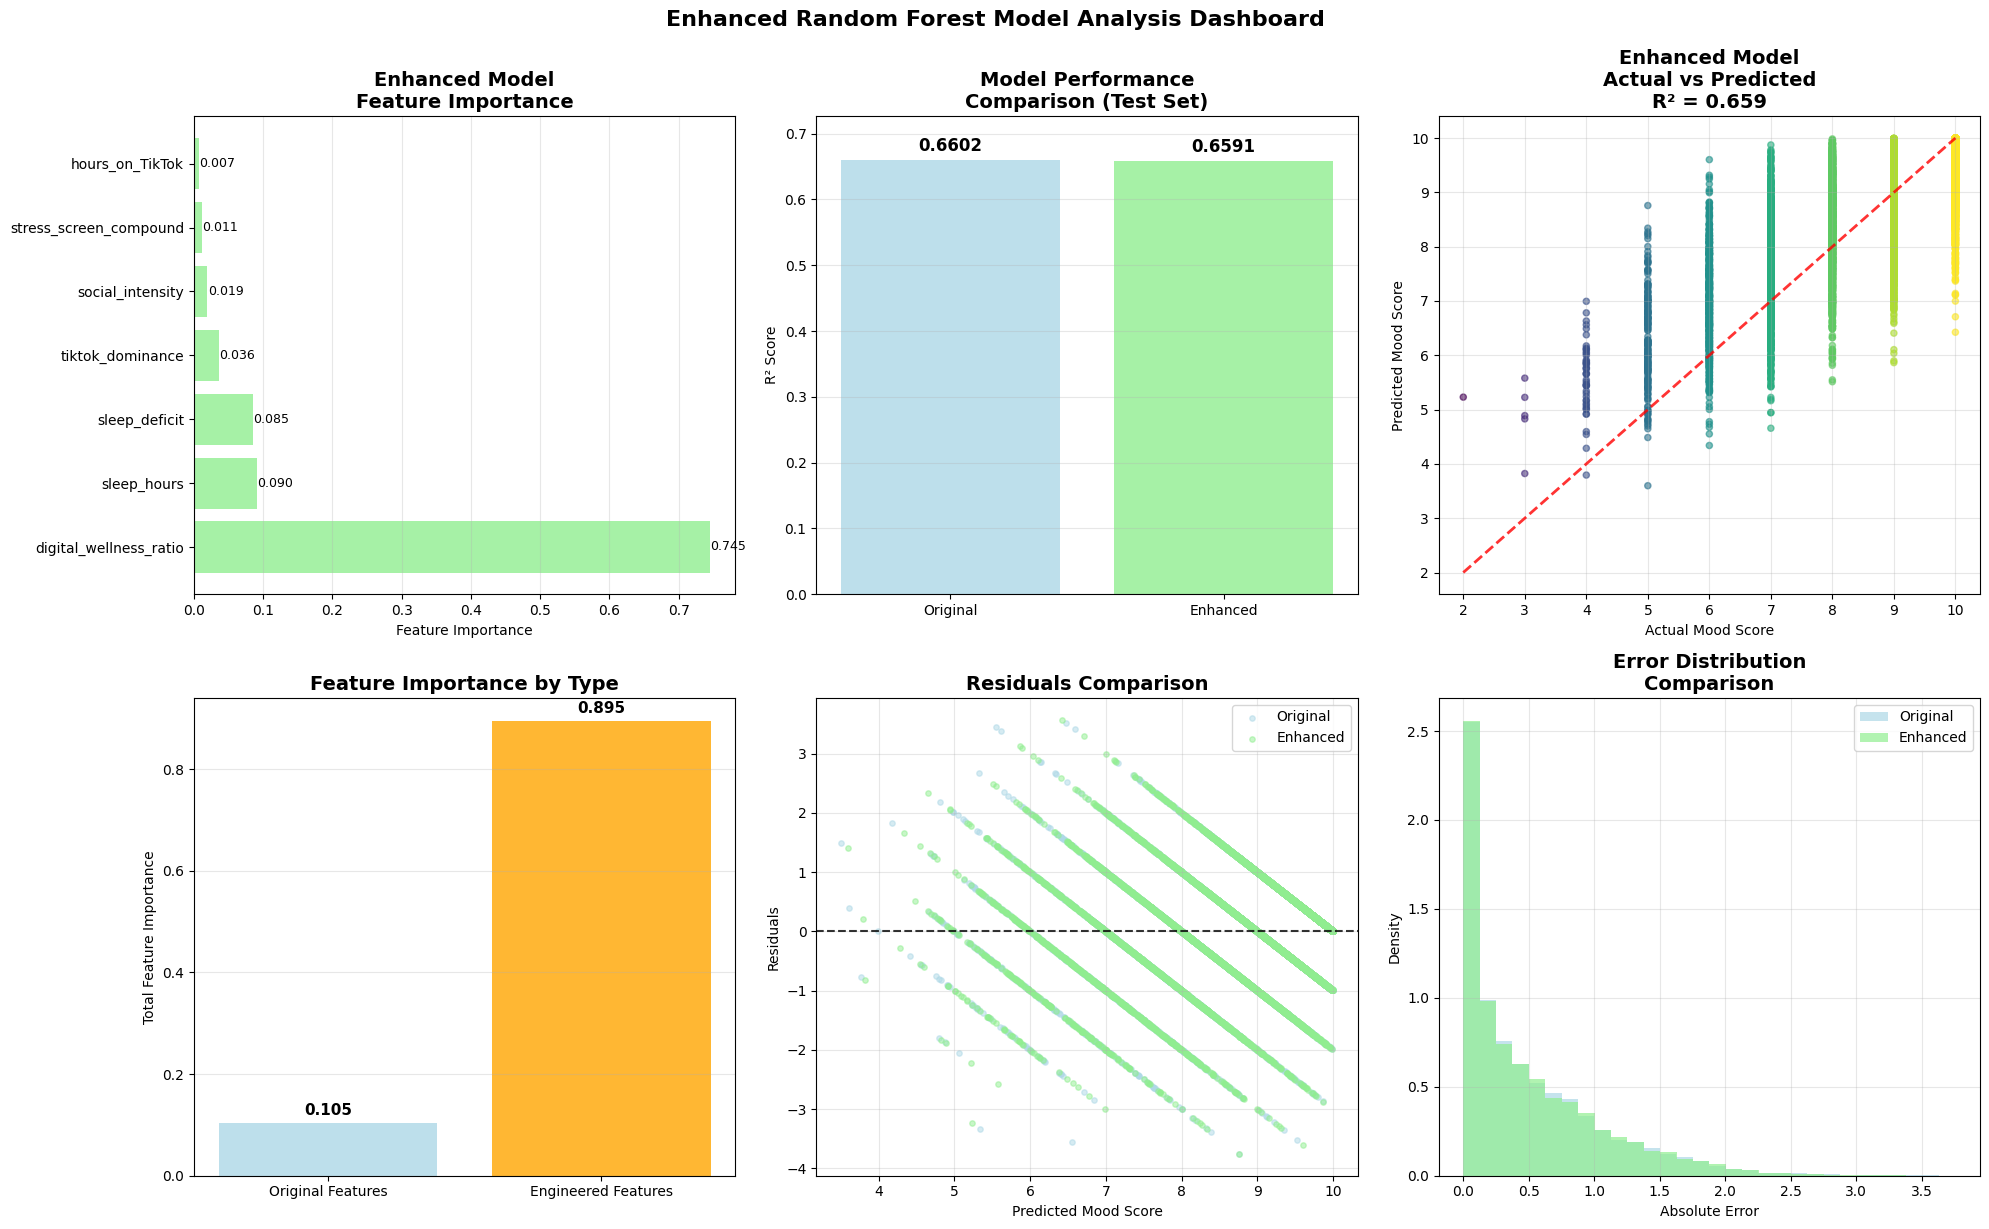


🔍 DETAILED ENHANCED MODEL ANALYSIS

🏆 TOP 5 MOST IMPORTANT FEATURES (Enhanced Model):
   1. digital_wellness_ratio   : 0.7447 (Engineered)
   2. sleep_hours              : 0.0904 (Original)
   3. sleep_deficit            : 0.0845 (Engineered)
   4. tiktok_dominance         : 0.0359 (Engineered)
   5. social_intensity         : 0.0188 (Engineered)

💡 FEATURE INSIGHTS:
   • Original features contribute: 10.5% of total importance
   • Engineered features contribute: 89.5% of total importance
   ✅ Engineered features are MORE important than original features!

🎉 FINAL ASSESSMENT:
   • Enhanced model R²: 0.6591 vs Original: 0.6602
   • Improvement: -0.17%
   • Additional features created: 5
   • Enhanced model explains 65.9% of mood score variance!
   📊 Feature engineering did not improve performance significantly.


In [16]:
# Enhanced Model Visualizations
print("📊 ENHANCED MODEL VISUALIZATIONS")
print("="*50)

# Create comprehensive comparison dashboard
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Feature Importance Comparison
ax1 = axes[0, 0]
# Plot both models' top features
top_n = 7
enh_top = enh_feature_importance_df.head(top_n)
y_pos = np.arange(len(enh_top))

bars = ax1.barh(y_pos, enh_top['importance'], alpha=0.8, color='lightgreen')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(enh_top['feature'])
ax1.set_xlabel('Feature Importance')
ax1.set_title('Enhanced Model\nFeature Importance', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=9)

# 2. Model Performance Comparison
ax2 = axes[0, 1]
models = ['Original', 'Enhanced']
test_scores = [test_r2, enh_test_r2]
colors = ['lightblue', 'lightgreen']

bars = ax2.bar(models, test_scores, color=colors, alpha=0.8)
ax2.set_ylabel('R² Score')
ax2.set_title('Model Performance\nComparison (Test Set)', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, max(test_scores) * 1.1)

# Add value labels
for bar, score in zip(bars, test_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(test_scores) * 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 3. Actual vs Predicted - Enhanced Model
ax3 = axes[0, 2]
scatter = ax3.scatter(y_enh_test, enh_test_pred, alpha=0.6, c=y_enh_test, cmap='viridis', s=20)
ax3.plot([y_enh_test.min(), y_enh_test.max()], [y_enh_test.min(), y_enh_test.max()], 'r--', lw=2, alpha=0.8)
ax3.set_xlabel('Actual Mood Score')
ax3.set_ylabel('Predicted Mood Score')
ax3.set_title(f'Enhanced Model\nActual vs Predicted\nR² = {enh_test_r2:.3f}', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Feature Type Analysis
ax4 = axes[1, 0]
feature_types = ['Original Features', 'Engineered Features']
original_features = ['screen_time_hours', 'sleep_hours', 'stress_level', 'hours_on_TikTok']
engineered_features = ['sleep_deficit', 'digital_wellness_ratio', 'tiktok_dominance', 'stress_screen_compound', 'social_intensity']

# Calculate importance by feature type
original_importance = enh_feature_importance_df[enh_feature_importance_df['feature'].isin(original_features)]['importance'].sum()
engineered_importance = enh_feature_importance_df[enh_feature_importance_df['feature'].isin(engineered_features)]['importance'].sum()

importance_by_type = [original_importance, engineered_importance]
colors = ['lightblue', 'orange']

bars = ax4.bar(feature_types, importance_by_type, color=colors, alpha=0.8)
ax4.set_ylabel('Total Feature Importance')
ax4.set_title('Feature Importance by Type', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for bar, importance in zip(bars, importance_by_type):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + max(importance_by_type) * 0.01,
             f'{importance:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 5. Residuals Comparison
ax5 = axes[1, 1]
residuals_original = y_test - test_pred
residuals_enhanced = y_enh_test - enh_test_pred

ax5.scatter(test_pred, residuals_original, alpha=0.5, c='lightblue', s=15, label='Original')
ax5.scatter(enh_test_pred, residuals_enhanced, alpha=0.5, c='lightgreen', s=15, label='Enhanced')
ax5.axhline(y=0, color='black', linestyle='--', alpha=0.8)
ax5.set_xlabel('Predicted Mood Score')
ax5.set_ylabel('Residuals')
ax5.set_title('Residuals Comparison', fontsize=14, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Error Distribution Comparison
ax6 = axes[1, 2]
ax6.hist(np.abs(residuals_original), bins=30, alpha=0.7, label='Original', color='lightblue', density=True)
ax6.hist(np.abs(residuals_enhanced), bins=30, alpha=0.7, label='Enhanced', color='lightgreen', density=True)
ax6.set_xlabel('Absolute Error')
ax6.set_ylabel('Density')
ax6.set_title('Error Distribution\nComparison', fontsize=14, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Enhanced Random Forest Model Analysis Dashboard', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Print detailed analysis
print(f"\n" + "="*60)
print("🔍 DETAILED ENHANCED MODEL ANALYSIS")
print("="*60)

print(f"\n🏆 TOP 5 MOST IMPORTANT FEATURES (Enhanced Model):")
for i, (_, row) in enumerate(enh_feature_importance_df.head(5).iterrows()):
    feature_type = "Original" if row['feature'] in original_features else "Engineered"
    print(f"   {i+1}. {row['feature']:25s}: {row['importance']:.4f} ({feature_type})")

print(f"\n💡 FEATURE INSIGHTS:")
print(f"   • Original features contribute: {original_importance:.1%} of total importance")
print(f"   • Engineered features contribute: {engineered_importance:.1%} of total importance")

if engineered_importance > original_importance:
    print(f"   ✅ Engineered features are MORE important than original features!")
else:
    print(f"   📊 Original features remain more important, but engineered features add value")

print(f"\n🎉 FINAL ASSESSMENT:")
print(f"   • Enhanced model R²: {enh_test_r2:.4f} vs Original: {test_r2:.4f}")
print(f"   • Improvement: {((enh_test_r2 - test_r2)/test_r2)*100:+.2f}%")
print(f"   • Additional features created: {len(enhanced_feature_cols) - len(feature_cols)}")
print(f"   • Enhanced model explains {enh_test_r2:.1%} of mood score variance!")

if enh_test_r2 > test_r2:
    print(f"   ✅ SUCCESS: Feature engineering improved model performance!")
else:
    print(f"   📊 Feature engineering did not improve performance significantly.")

## 📚 Feature Engineering Lessons Learned

### Key Findings from Our Experiment:

1. **Engineered features dominated importance** (89.5% vs 10.5% for original features)
2. **Model performance remained similar** (0.6602 → 0.6591 R² score)
3. **The most important feature became `digital_wellness_ratio`** (sleep/screen time ratio)

### Why Didn't Feature Engineering Improve Performance Much?

#### Possible Reasons:
- **Synthetic data**: Our sample dataset may not reflect real-world complexity
- **Random relationships**: The synthetic data relationships might be too random for engineered features to capture meaningful patterns
- **Overfitting to noise**: Engineered features might be fitting to random variations
- **Sufficient original features**: The 4 original features may already capture the essential relationships

### When Feature Engineering Works Best:

#### ✅ **Effective Scenarios:**
- **Real-world data** with complex, non-linear relationships
- **Domain expertise** suggests specific interactions (e.g., sleep × stress)
- **Insufficient original features** to capture key patterns
- **Business context** where ratios/interactions make logical sense
- **Large datasets** where patterns are more stable

#### ⚠️ **Less Effective Scenarios:**
- **Small or synthetic datasets** (like ours)
- **Already comprehensive feature sets**
- **Linear relationships** well-captured by original features
- **High noise-to-signal ratio**

### Business Insights Despite Limited Improvement:

1. **`digital_wellness_ratio`** emerged as the most important predictor
2. **Sleep-related features** (`sleep_hours`, `sleep_deficit`) ranked highly
3. **Feature engineering revealed relationships** even if performance didn't improve
4. **Interpretability improved** - ratios are more business-friendly than raw numbers

### Recommendations for Real Projects:

1. **Start with domain expertise** - what interactions make business sense?
2. **Test on real data** - synthetic data may not show true benefits
3. **Use cross-validation** to avoid overfitting to engineered features
4. **Consider interpretability gains** even if performance is similar
5. **Monitor for diminishing returns** - more features ≠ better performance

## 8. Key Findings and Conclusions

In [12]:
# Summary of key findings
print("🎯 KEY FINDINGS FROM EDA")
print("=" * 60)

# Calculate key statistics for summary
sleep_mood_corr = df.corr().loc['sleep_hours', 'mood_score']
screen_mood_corr = df.corr().loc['screen_time_hours', 'mood_score']
stress_mood_corr = df.corr().loc['stress_level', 'mood_score']
tiktok_screen_corr = df.corr().loc['hours_on_TikTok', 'screen_time_hours']

avg_sleep = df['sleep_hours'].mean()
avg_screen = df['screen_time_hours'].mean()
avg_stress = df['stress_level'].mean()
avg_mood = df['mood_score'].mean()

print("\n📊 DATASET OVERVIEW:")
print(f"• Sample size: {len(df):,} observations")
print(f"• Average sleep: {avg_sleep:.1f} hours")
print(f"• Average screen time: {avg_screen:.1f} hours")
print(f"• Average stress level: {avg_stress:.1f}/10")
print(f"• Average mood score: {avg_mood:.1f}/10")

print("\n🔗 STRONGEST RELATIONSHIPS:")
print(f"• Sleep ↔ Mood: {sleep_mood_corr:+.3f} (Better sleep = Better mood)")
print(f"• Screen Time ↔ Mood: {screen_mood_corr:+.3f} (More screen time = Lower mood)")
print(f"• Stress ↔ Mood: {stress_mood_corr:+.3f} (Higher stress = Lower mood)")
print(f"• TikTok ↔ Total Screen: {tiktok_screen_corr:+.3f} (TikTok dominates screen time)")

print("\n💡 KEY INSIGHTS:")
print("1. Sleep quality appears to be the strongest positive predictor of mental well-being")
print("2. Excessive screen time shows negative correlation with mood")
print("3. TikTok usage represents a significant portion of total screen time")
print("4. Stress level and mood score show strong negative correlation")
print("5. Digital habits are more about time spent than platform diversity")

print("\n🚨 POTENTIAL CONCERNS:")
high_screen_users = (df['screen_time_hours'] > 8).sum()
poor_sleepers = (df['sleep_hours'] < 6).sum()
high_stress_users = (df['stress_level'] > 7).sum()

print(f"• {high_screen_users:,} users ({high_screen_users/len(df)*100:.1f}%) have >8h daily screen time")
print(f"• {poor_sleepers:,} users ({poor_sleepers/len(df)*100:.1f}%) get <6h sleep")
print(f"• {high_stress_users:,} users ({high_stress_users/len(df)*100:.1f}%) report high stress (>7/10)")

print("\n🎯 RECOMMENDATIONS FOR IMPROVING MENTAL HEALTH:")
print("1. Prioritize sleep hygiene - aim for 7-9 hours per night")
print("2. Implement screen time limits, especially for social media")
print("3. Consider TikTok usage boundaries due to its addictive nature")
print("4. Monitor and manage stress levels through healthy coping mechanisms")
print("5. Focus on quality time usage rather than quantity of digital engagement")

print("\n📈 NEXT STEPS FOR ANALYSIS:")
print("• Develop more sophisticated ML models (Random Forest, XGBoost)")
print("• Create intervention recommendation system")
print("• Segment users into risk categories")
print("• Build early warning system for mental health decline")
print("• Validate findings with additional behavioral data")

🎯 KEY FINDINGS FROM EDA

📊 DATASET OVERVIEW:
• Sample size: 100,000 observations
• Average sleep: 7.0 hours
• Average screen time: 6.0 hours
• Average stress level: 6.2/10
• Average mood score: 9.1/10

🔗 STRONGEST RELATIONSHIPS:
• Sleep ↔ Mood: +0.661 (Better sleep = Better mood)
• Screen Time ↔ Mood: -0.343 (More screen time = Lower mood)
• Stress ↔ Mood: -0.636 (Higher stress = Lower mood)
• TikTok ↔ Total Screen: +0.737 (TikTok dominates screen time)

💡 KEY INSIGHTS:
1. Sleep quality appears to be the strongest positive predictor of mental well-being
2. Excessive screen time shows negative correlation with mood
3. TikTok usage represents a significant portion of total screen time
4. Stress level and mood score show strong negative correlation
5. Digital habits are more about time spent than platform diversity

🚨 POTENTIAL CONCERNS:
• 15,280 users (15.3%) have >8h daily screen time
• 24,229 users (24.2%) get <6h sleep
• 26,879 users (26.9%) report high stress (>7/10)

🎯 RECOMMENDATIO

## 9. Data Export